In [100]:
import pandas as pd

# Load the training dataset
train_path = "C:/Users/Aravi/PycharmProjects/Liar2-Misinformation-Network-Analysis/data/LIAR/train.tsv"

# Define column names based on LIAR dataset documentation
column_names = [
    "id","label", "statement", "subject", "speaker", "job_title", "state",
    "party", "barely_true_counts", "false_counts", "half_true_counts",
    "mostly_true_counts", "pants_on_fire_counts", "context"
]

# Load the dataset
train_df = pd.read_csv(train_path, sep='\t', names=column_names, header=None)


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10240 non-null  object 
 1   label                 10240 non-null  object 
 2   statement             10240 non-null  object 
 3   subject               10238 non-null  object 
 4   speaker               10238 non-null  object 
 5   job_title             7342 non-null   object 
 6   state                 8030 non-null   object 
 7   party                 10238 non-null  object 
 8   barely_true_counts    10238 non-null  float64
 9   false_counts          10238 non-null  float64
 10  half_true_counts      10238 non-null  float64
 11  mostly_true_counts    10238 non-null  float64
 12  pants_on_fire_counts  10238 non-null  float64
 13  context               10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [102]:
train_df.head()

,id,label,statement,subject,speaker,job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [103]:
# Check for missing values
missing_values = train_df.isnull().sum()
missing_values

id                         0
label                      0
statement                  0
subject                    2
speaker                    2
job_title               2898
state                   2210
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

In [104]:
#checking missing percentages
missing_percent = train_df.isnull().mean() * 100
print(missing_percent[['job_title', 'state']])

job_title    28.300781
state        21.582031
dtype: float64


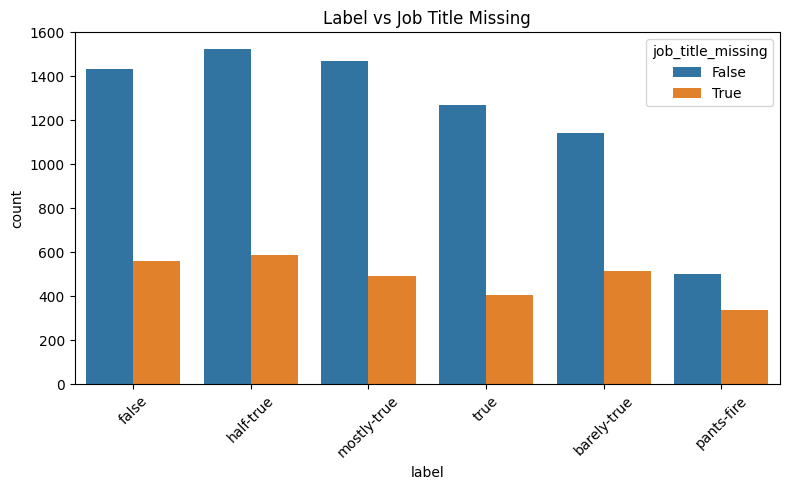

In [105]:
from matplotlib import pyplot as plt
import seaborn as sns

train_df['job_title_missing'] = train_df['job_title'].isnull()
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='label', hue='job_title_missing')
plt.title("Label vs Job Title Missing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

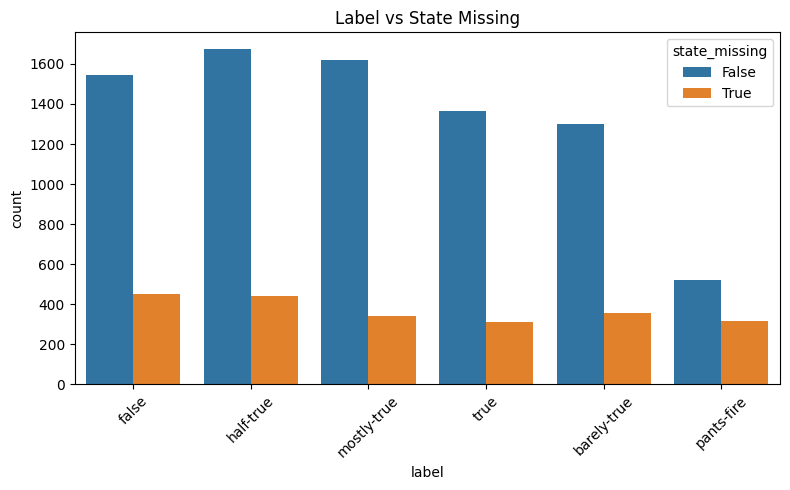

In [106]:
from matplotlib import pyplot as plt
import seaborn as sns

train_df['state_missing'] = train_df['state'].isnull()
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='label', hue='state_missing')
plt.title("Label vs State Missing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

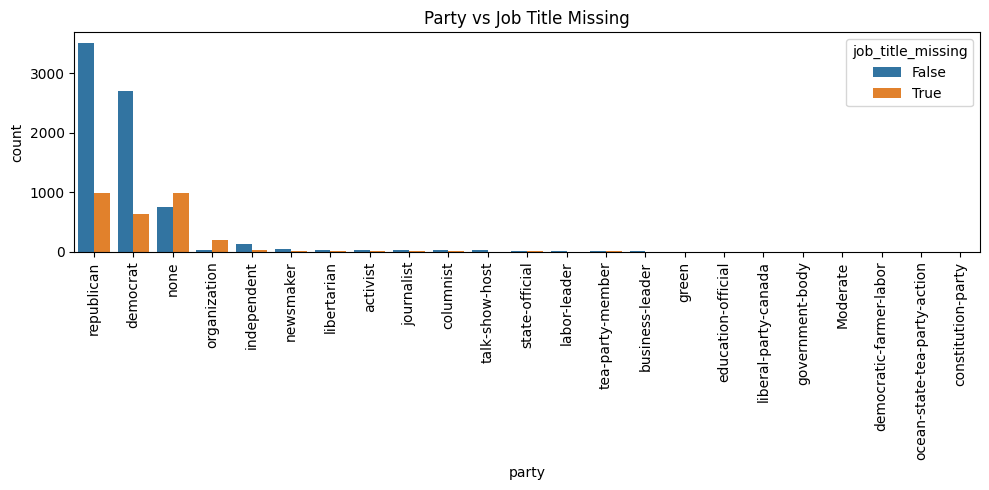

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='party', hue='job_title_missing', order=train_df['party'].value_counts().index)
plt.title("Party vs Job Title Missing")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

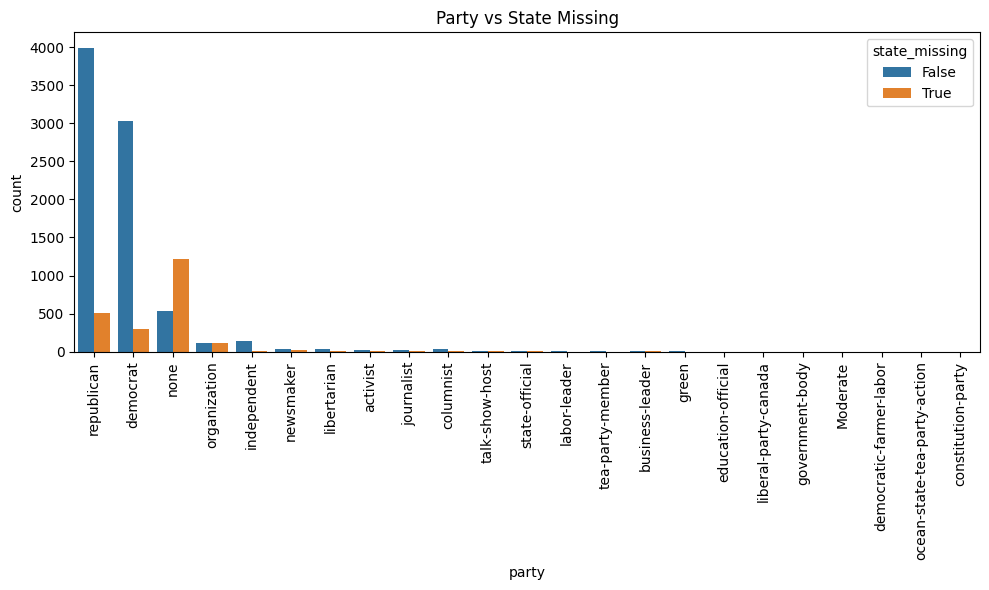

In [108]:
train_df['state_missing'] = train_df['state'].isnull()
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='party', hue='state_missing', order=train_df['party'].value_counts().index)
plt.title("Party vs State Missing")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

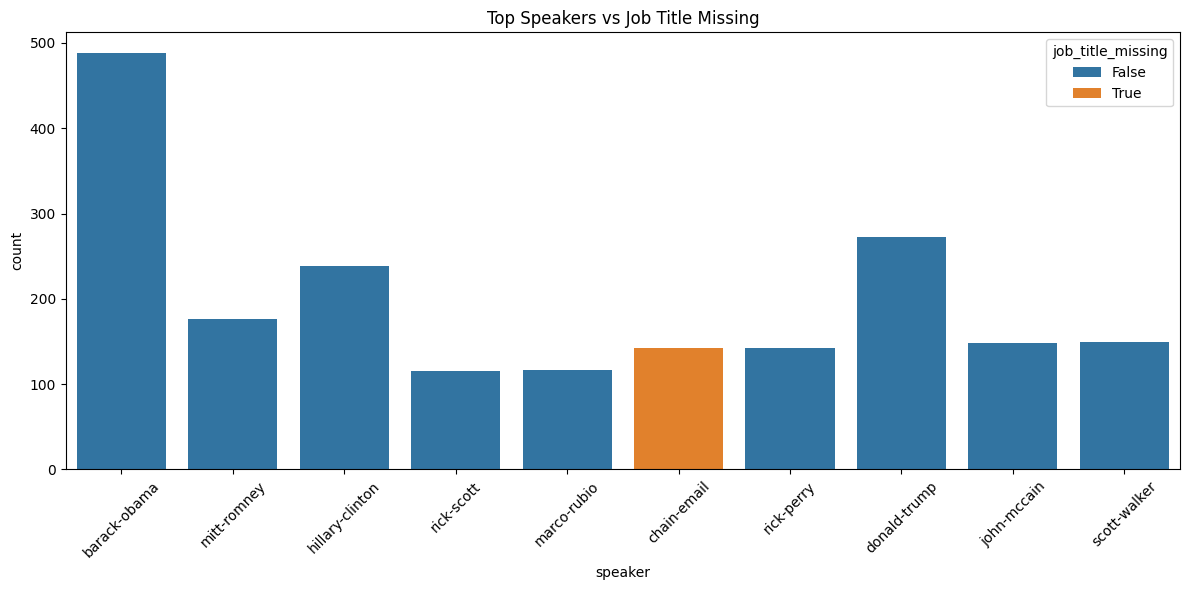

In [109]:
top_speakers = train_df['speaker'].value_counts().nlargest(10).index
subset = train_df[train_df['speaker'].isin(top_speakers)]

plt.figure(figsize=(12, 6))
sns.countplot(data=subset, x='speaker', hue='job_title_missing')
plt.title("Top Speakers vs Job Title Missing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

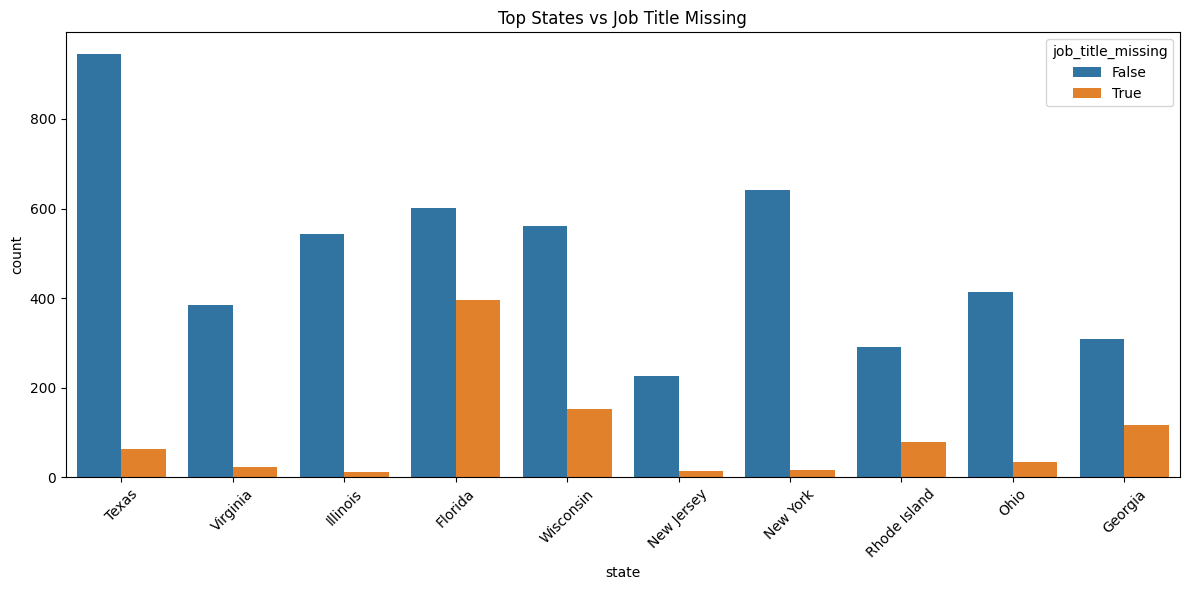

In [110]:
# Focus on rows where state is available
state_jobtitle = train_df[train_df['state'].notnull()]

# Only use top 10 frequent states for readability
top_states = state_jobtitle['state'].value_counts().nlargest(10).index
subset = state_jobtitle[state_jobtitle['state'].isin(top_states)]

plt.figure(figsize=(12, 6))
sns.countplot(data=subset, x='state', hue='job_title_missing')
plt.title("Top States vs Job Title Missing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

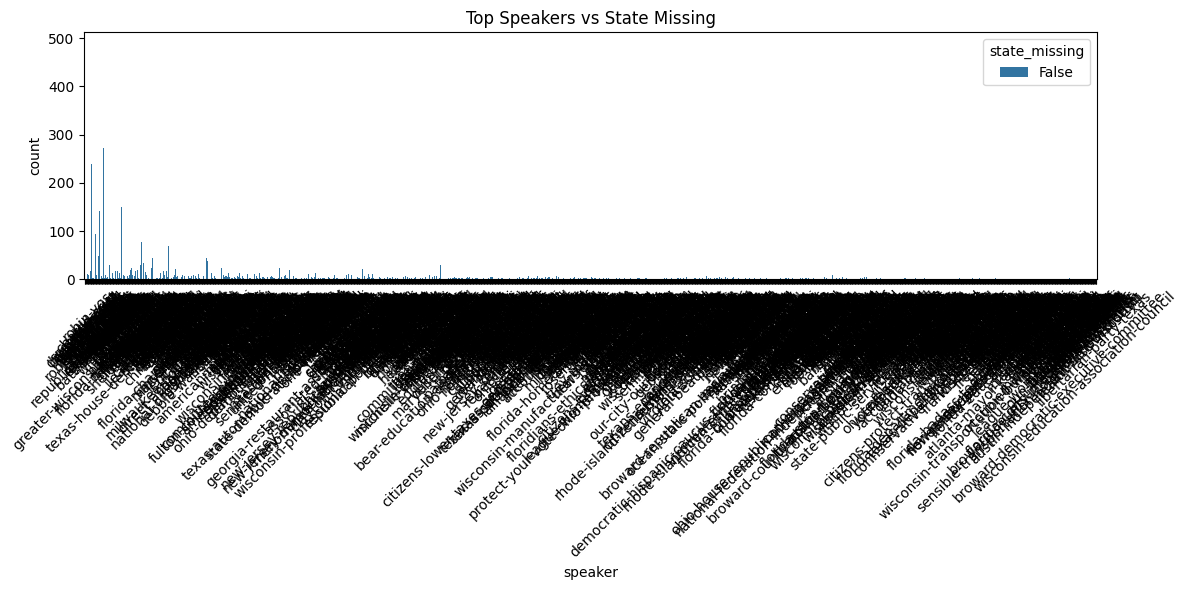

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(data=subset, x='speaker', hue='state_missing')
plt.title("Top Speakers vs State Missing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

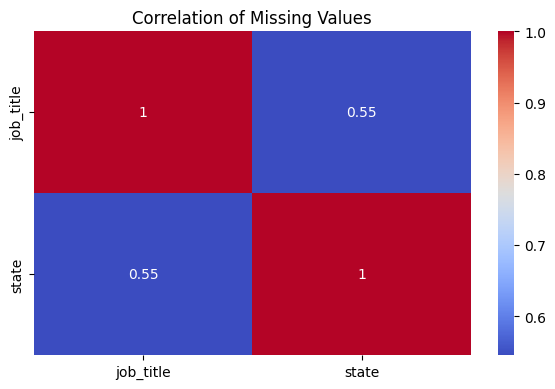

In [112]:
# Convert to binary: 1 if missing, 0 if not
missing_flags = train_df[['job_title', 'state']].isnull().astype(int)
missing_corr = missing_flags.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Missing Values")
plt.tight_layout()
plt.show()

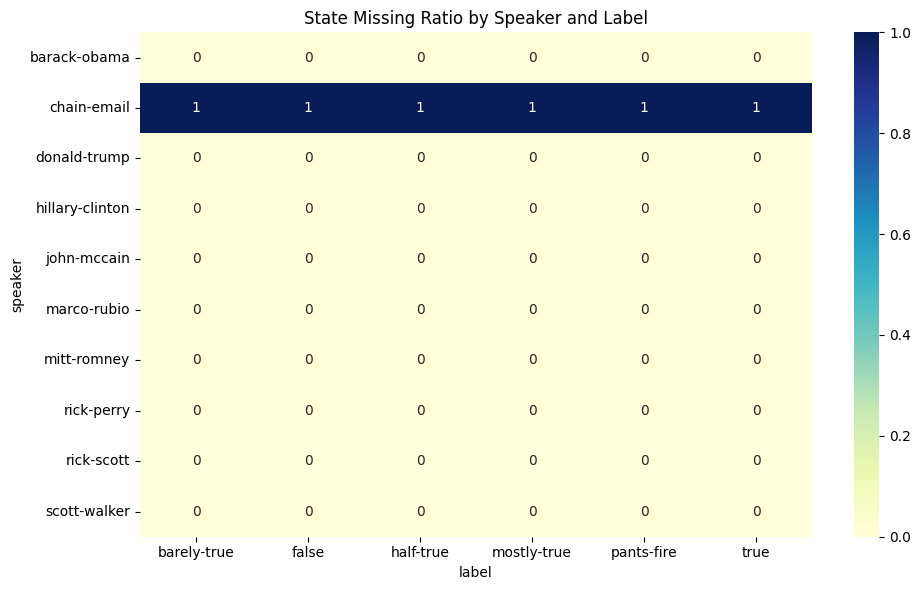

In [113]:
top_speakers = train_df['speaker'].value_counts().nlargest(10).index
speaker_subset = train_df[train_df['speaker'].isin(top_speakers)]

heatmap_data = speaker_subset.pivot_table(
    index='speaker', columns='label', values='state_missing', aggfunc='mean'
).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title("State Missing Ratio by Speaker and Label")
plt.tight_layout()
plt.show()

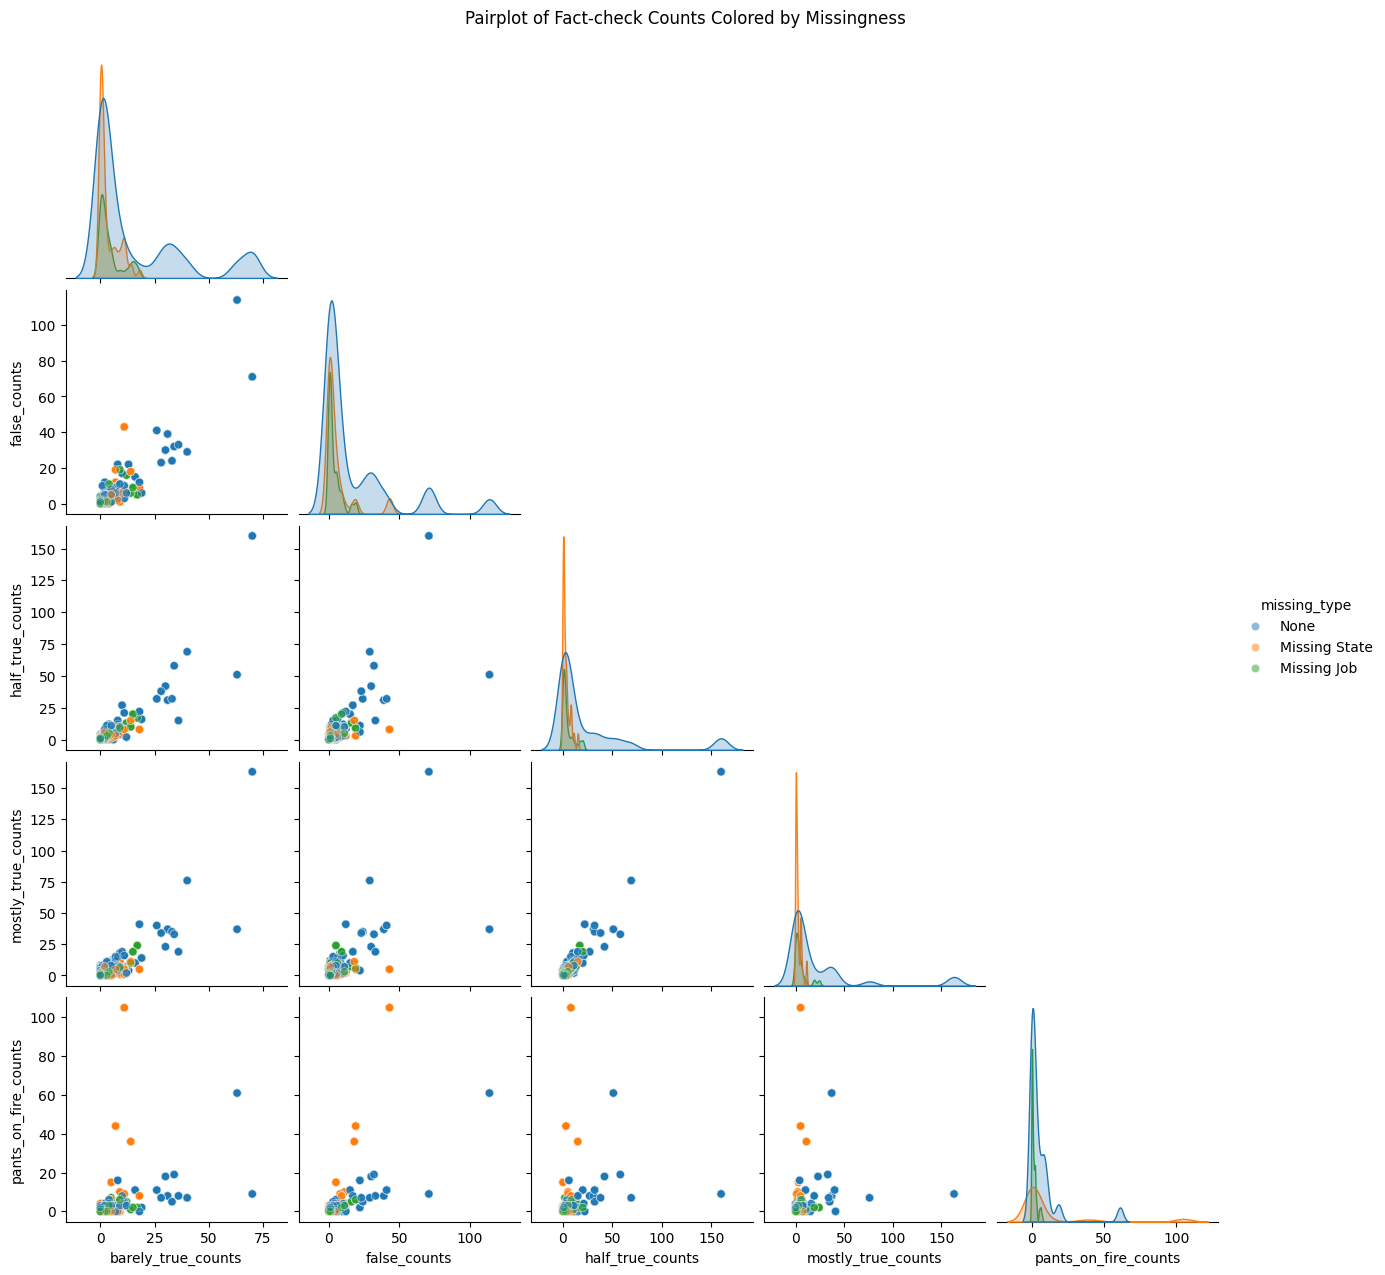

In [114]:
from seaborn import pairplot
train_df['missing_type'] = train_df.apply(
    lambda row: 'Missing State' if pd.isnull(row['state']) else
                ('Missing Job' if pd.isnull(row['job_title']) else 'None'), axis=1
)

pairplot_data = train_df[[
    'barely_true_counts', 'false_counts', 'half_true_counts',
    'mostly_true_counts', 'pants_on_fire_counts', 'missing_type'
]]

sns.pairplot(pairplot_data, hue='missing_type', corner=True, plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Fact-check Counts Colored by Missingness", y=1.02)
plt.show()

In [115]:
corrections = {
    "Tex": "Texas",
    "Pa - Pennsylvania": "Pennsylvania",
    "Washington D.C.": "Washington, D.C.",
    "District Of Columbia": "Washington, D.C.",
    "Washington State": "Washington",
    "Rhode Island ": "Rhode Island",
    "Rhode island": "Rhode Island",
    "New Hampshire ": "New Hampshire",
    "Virgina": "Virginia",
    "Virgiia": "Virginia",
    "Tennesse": "Tennessee",
    "Oh": "Ohio",
    "Ohio": "Ohio",
    "California.": "California",
    "New York ": "New York",
    "Washington Dc": "Washington, D.C.",
    "Virginia Director, Coalition To Stop Gun Violence": "Virginia",
    "The United States": "Unknown",
    "Atlanta": "Georgia"
}

In [116]:
train_df['state_cleaned'] = train_df['state'].replace(corrections)
train_df = train_df.drop(columns=['state'])
train_df = train_df.rename(columns={'state_cleaned': 'state'})

In [117]:
train_df['state'] = train_df.groupby('speaker')['state'].transform(
    lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x
)
train_df['state'] = train_df['state'].fillna("Unknown")

In [118]:
# Drop job_title due to sparse & speaker-dependent nulls
df = train_df.drop(columns=['job_title'])

In [119]:
# Count of statements per state
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
state_counts

,state,count
0,Unknown,2195
1,Texas,1011
2,Florida,997
3,Wisconsin,713
4,New York,659
...,...,...
68,Hawaii,1
69,Washington DC,1
70,Wisconsin,1
71,PA - Pennsylvania,1


In [120]:
train_df = df

In [121]:
# Drop rows where 'speaker' or 'subject' is missing
train_df.dropna(subset=["speaker", "subject"], inplace=True)
# Fill missing 'party' with "Independent"
train_df["party"].fillna("Independent", inplace=True)
# Fill missing 'state' and 'context' with "Unknown"
train_df["context"].fillna("Unknown", inplace=True)
# Fill missing fact-check counts with 0
fact_check_cols = ["barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts"]
train_df[fact_check_cols] = train_df[fact_check_cols].fillna(0)


C:\Users\Aravi\AppData\Local\Temp\ipykernel_46552\3548099925.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["party"].fillna("Independent", inplace=True)
C:\Users\Aravi\AppData\Local\Temp\ipykernel_46552\3548099925.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [127]:
train_df

,id,label,statement,subject,speaker,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,job_title_missing,state_missing,missing_type,state
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican,0.0,1.0,0.0,0.0,0.0,a mailer,False,False,None,Texas
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,False,False,None,Virginia
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat,70.0,71.0,160.0,163.0,9.0,Denver,False,False,None,Illinois
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,none,7.0,19.0,3.0,5.0,44.0,a news release,True,True,Missing State,Unknown
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,True,False,Missing Job,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",True,False,Missing Job,Florida
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,republican,0.0,0.0,0.0,1.0,0.0,an interview,True,False,Missing Job,Georgia
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,True,False,Missing Job,Georgia
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,True,False,Missing Job,Florida


In [128]:
train_df.dtypes

id                       object
label                    object
statement                object
subject                  object
speaker                  object
party                    object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
job_title_missing          bool
state_missing              bool
missing_type             object
state                    object
dtype: object

In [130]:
# Convert text-based columns to string type explicitly
text_columns = ["label", "statement", "subject", "speaker",  "party", "context","state"]
train_df[text_columns] = train_df[text_columns].astype(str)
# Verify column data types
print(train_df.dtypes)

id                       object
label                    object
statement                object
subject                  object
speaker                  object
party                    object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
job_title_missing          bool
state_missing              bool
missing_type             object
state                    object
dtype: object


In [131]:
import re

# Define categories and their associated keywords (including article)
context_categories = {
    "interview": ["interview", "interviews"],
    "debate": ["debate"],
    "social media post": ["tweet", "twitter", "facebook post", "facebook", "instagram", "social media"],
    "statement": ["speech", "remarks", "address", "statement", "talk show","townhall", "town hall","committee meeting",
                  "hearing", "conference", "discussion", "comments", "forum"],
    "campaign": ["tv ad", "tv commercial", "campaign ad", "campaign tv ad","web ad", "commercial","advertisement", "ad", "campaign"],
    "news media": ["article", "news article", "op-ed", "editorial", "oped", "opinion-piece", "opinion piece", "news", "news release",
                "press release", "newspaper", "headline","opinion column", "reporters", "column", "reporter", "press", "newsletter"],
    "email": ["email", "e-mail"],
    "unknown": ["unknown"]
}

# Function to assign categories
def categorize_context(context_text):
    context_text = str(context_text).lower().strip()  # Normalize text
    for category, keywords in context_categories.items():
        if any(re.search(rf"\b{kw}\b", context_text) for kw in keywords):
            return category
    return "Other"  # Default category for unmatched values

# Apply function to categorize the context column
train_df["context_category"] = train_df["context"].apply(categorize_context)

In [132]:
category_counts = train_df['context_category'].value_counts()
print(category_counts)

context_category
statement            2390
interview            1753
Other                1652
campaign             1439
news media           1390
debate                765
social media post     479
email                 270
unknown               100
Name: count, dtype: int64


In [133]:
interview_df = train_df[train_df['context_category'] == 'Other']
interview_df.tail()

,id,label,statement,subject,speaker,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,job_title_missing,state_missing,missing_type,state,context_category
10196,4387.json,mostly-true,Rail doesnt do a great job in lessening traffic.,transportation,chip-rogers,republican,1.0,0.0,1.0,1.0,0.0,a meeting,False,False,None,Georgia,Other
10206,7652.json,pants-fire,Gov. Scott Walker (is) more than halfway to (h...,jobs,maciver-institute,independent,1.0,0.0,0.0,1.0,1.0,a web posting,False,False,None,Wisconsin,Other
10215,9365.json,barely-true,"The Obama administration spent $205,075 in sti...","economy,stimulus",ted-cruz,republican,36.0,33.0,15.0,19.0,8.0,a report,False,False,None,Texas,Other
10218,1674.json,false,This race will be the Democrats top target thi...,"elections,states",debra-lehrmann,republican,0.0,1.0,0.0,0.0,0.0,a mailer,True,True,Missing State,Unknown,Other
10233,4388.json,pants-fire,Mayor Fung wants to punish our childrens educa...,"children,city-budget,deficit,education,state-b...",richard-tomlins,democrat,0.0,0.0,0.0,0.0,1.0,a recorded telephone message to Cranston resid...,True,False,Missing Job,Rhode Island,Other


In [134]:
# Count unique values
unique_speakers = train_df["subject"].nunique()
unique_parties = train_df["party"].nunique()
unique_contexts = train_df["context"].nunique()

unique_speakers, unique_parties, unique_contexts

(3827, 23, 4346)

In [135]:
train_df.dtypes

id                       object
label                    object
statement                object
subject                  object
speaker                  object
party                    object
barely_true_counts      float64
false_counts            float64
half_true_counts        float64
mostly_true_counts      float64
pants_on_fire_counts    float64
context                  object
job_title_missing          bool
state_missing              bool
missing_type             object
state                    object
context_category         object
dtype: object

In [137]:
train_df.to_csv("C:/Users/Aravi/PycharmProjects/Liar2-Misinformation-Network-Analysis/data/LIAR/cleaned_train", index=False, encoding="utf-8")